Accuracy - 85.17

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
train_df = pd.read_excel("Data_Train.xlsx")
test_df = pd.read_excel("Data_Test.xlsx")
#submission = pd.read_excel("Sample_submission.xlsx")

In [0]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:
train_df = pd.read_excel("Data_Train.xlsx")
#remove Name of Vehice
train_df = train_df.iloc[:,1:]
train_df = train_df.drop(['New_Price'],axis=1)
#integer encode Location
location = np.array(train_df['Location'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
train_df['Location'] = integer_encoded

#integer encode Year
location = np.array(train_df['Year'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
train_df['Year'] = integer_encoded

#integer encode Fuel_type
location = np.array(train_df['Fuel_Type'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
train_df['Fuel_Type'] = integer_encoded

#integer encode Transmission
location = np.array(train_df['Transmission'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
train_df['Transmission'] = integer_encoded

#integer encode Owner_Type
location = np.array(train_df['Owner_Type'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
train_df['Owner_Type'] = integer_encoded

train_df = train_df.dropna(axis=0)

mileage = np.array(train_df['Mileage'])
l=[]
for i in range(0,mileage.shape[0]):
  temp = mileage[i]
  l.append((float)(temp[0:temp.find(" ")]))
train_df['Mileage'] = l

engine = np.array(train_df['Engine'])
l=[]
for i in range(0,engine.shape[0]):
  temp = engine[i]
  l.append((float)(temp[0:temp.find(" ")]))
train_df['Engine'] = l

power = np.array(train_df['Power'])
l=[]
for i in range(0,power.shape[0]):
  temp = power[i]
  if temp.find("null") == -1:
    l.append((float)(temp[0:temp.find(" ")]))
  else:
    l.append(0.0)
train_df['Power'] = l

In [0]:
for i in range(0,train_df.shape[1]):
  print(train_df.iloc[:,i:i+1].min()," ",train_df.iloc[:,i:i+1].max())  

Location    0
dtype: int64   Location    10
dtype: int64
Year    0
dtype: int64   Year    21
dtype: int64
Kilometers_Driven    171
dtype: int64   Kilometers_Driven    6500000
dtype: int64
Fuel_Type    0
dtype: int64   Fuel_Type    4
dtype: int64
Transmission    0
dtype: int64   Transmission    1
dtype: int64
Owner_Type    0
dtype: int64   Owner_Type    3
dtype: int64
Mileage    0.0
dtype: float64   Mileage    33.54
dtype: float64
Engine    624.0
dtype: float64   Engine    5998.0
dtype: float64
Power    0.0
dtype: float64   Power    560.0
dtype: float64
Seats    0.0
dtype: float64   Seats    10.0
dtype: float64
Price    0.44
dtype: float64   Price    160.0
dtype: float64


In [0]:
normalize_train = [[0,10],[0,21],[171,6500000],[0,4],[0,1],[0,3],[0.0,33.54],[624.0,5998.0],[0,560.0],[0,10],[0.44,160]]
for i in range(0,train_df.shape[1]-1):
  train_df.iloc[:,i:i+1] = ((train_df.iloc[:,i:i+1] - normalize_train[i][0]))/(normalize_train[i][1] - normalize_train[i][0])

In [0]:
train_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0.9,0.571429,0.011051,0.00,1.0,0.000000,0.793083,0.069594,0.103857,0.5,1.75
1,1.0,0.809524,0.006282,0.25,1.0,0.000000,0.586464,0.178266,0.225357,0.5,12.50
2,0.2,0.619048,0.007051,1.00,1.0,0.000000,0.542636,0.106997,0.158393,0.5,4.50
3,0.2,0.666667,0.013359,0.25,1.0,0.000000,0.619261,0.116115,0.158500,0.7,6.00
4,0.3,0.714286,0.006231,0.25,0.0,0.666667,0.453190,0.250093,0.251429,0.5,17.74


In [0]:
test_df = pd.read_excel("Data_Test.xlsx")

#remove Name of Vehice
test_df = test_df.iloc[:,1:]
test_df = test_df.drop(['New_Price'],axis=1)
#integer encode Location
location = np.array(test_df['Location'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
test_df['Location'] = integer_encoded

#integer encode Year
location = np.array(test_df['Year'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
test_df['Year'] = integer_encoded

#integer encode Fuel_type
location = np.array(test_df['Fuel_Type'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
test_df['Fuel_Type'] = integer_encoded

#integer encode Transmission
location = np.array(test_df['Transmission'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
test_df['Transmission'] = integer_encoded

#integer encode Owner_Type
location = np.array(test_df['Owner_Type'])
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(location)
test_df['Owner_Type'] = integer_encoded

test_df = test_df.fillna(0)

mileage = np.array(test_df['Mileage'])
l=[]
for i in range(0,mileage.shape[0]):
  temp = mileage[i]
  l.append((float)(temp[0:temp.find(" ")]))
test_df['Mileage'] = l

engine = np.array(test_df['Engine'])
l=[]
for i in range(0,engine.shape[0]):
  temp = engine[i]
  if temp!=0:
    l.append((float)(temp[0:temp.find(" ")]))
  else:
    l.append(0)
test_df['Engine'] = l

power = np.array(test_df['Power'])
l=[]
for i in range(0,power.shape[0]):
  temp = power[i]
  if temp==0:
    l.append(0.0)
    continue
  if temp.find("null") == -1:
    l.append((float)(temp[0:temp.find(" ")]))
  else:
    l.append(0.0)
test_df['Power'] = l


In [0]:
test_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.4,0.736842,0.114410,0.000000,1.0,0.000000,1.000000,0.166389,0.094481,0.4
1,0.3,0.684211,0.153275,1.000000,1.0,0.666667,0.765654,0.132711,0.076786,0.5
2,0.9,0.894737,0.094556,0.333333,1.0,0.000000,0.424055,0.398966,0.239935,0.7
3,0.5,0.631579,0.395415,0.333333,1.0,0.000000,0.731246,0.227409,0.000000,0.5
4,0.9,0.736842,0.080229,1.000000,1.0,0.000000,0.573466,0.199567,0.134497,0.5


In [0]:
normalize_test = []
for i in range(0,test_df.shape[1]):
  #print(train_df.iloc[:,i:i+1].min()," ",train_df.iloc[:,i:i+1].max())  
  normalize_test.append([test_df.iloc[:,i:i+1].min() , test_df.iloc[:,i:i+1].max()])
  
for i in range(0,test_df.shape[1]):
  test_df.iloc[:,i:i+1] = ((test_df.iloc[:,i:i+1] - normalize_test[i][0]))/(normalize_test[i][1] - normalize_test[i][0])

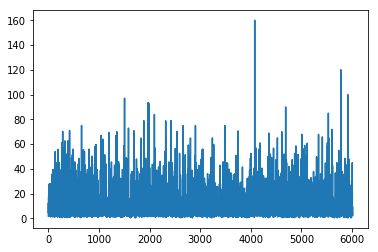

In [0]:
plt.plot(train_df['Price'])

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.4,0.736842,0.114410,0.000000,1.0,0.000000,1.000000,0.166389,0.094481,0.4
1,0.3,0.684211,0.153275,1.000000,1.0,0.666667,0.765654,0.132711,0.076786,0.5
2,0.9,0.894737,0.094556,0.333333,1.0,0.000000,0.424055,0.398966,0.239935,0.7
3,0.5,0.631579,0.395415,0.333333,1.0,0.000000,0.731246,0.227409,0.000000,0.5
4,0.9,0.736842,0.080229,1.000000,1.0,0.000000,0.573466,0.199567,0.134497,0.5
5,0.3,0.842105,0.242433,0.333333,1.0,0.666667,0.495970,0.363288,0.227273,0.7
6,1.0,0.789474,0.166189,0.333333,0.0,0.000000,0.389027,0.497166,0.273864,0.7
7,0.6,0.684211,0.183381,1.000000,1.0,0.000000,0.654061,0.135712,0.089610,0.5
8,0.9,0.578947,0.186246,1.000000,1.0,0.666667,0.526968,0.249583,0.191558,0.5
9,0.3,0.789474,0.153822,0.333333,1.0,0.000000,0.468072,0.363288,0.227273,0.7


In [0]:
X_train = np.array(train_df.iloc[:4000,:-1])
X_test = np.array(train_df.iloc[4000:,:-1])


In [0]:
y_train = np.array(train_df.iloc[:4000,-1])
y_test = np.array(train_df.iloc[4000:,-1])

In [0]:
print("X_train shape : ",X_train.shape)
print("Y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_test shape : ",y_test.shape)


X_train shape :  (4000, 10)
Y_train shape :  (4000,)
X_test shape :  (1975, 10)
Y_test shape :  (1975,)


In [0]:
#define model
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()
model.add(Dense(32, input_dim = 10, activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [0]:
np.max(y_test)

160.0

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

Train on 4000 samples, validate on 1975 samples
Epoch 1/50
4000/4000 [==============================] - 1s 350us/step - loss: 112.1302 - mean_squared_error: 104.7415 - val_loss: 68.9202 - val_mean_squared_error: 62.6416
Epoch 2/50
4000/4000 [==============================] - 0s 115us/step - loss: 52.5976 - mean_squared_error: 46.5487 - val_loss: 55.8634 - val_mean_squared_error: 49.9718
Epoch 3/50
4000/4000 [==============================] - 0s 112us/step - loss: 44.7432 - mean_squared_error: 38.7581 - val_loss: 47.1870 - val_mean_squared_error: 41.1722
Epoch 4/50
4000/4000 [==============================] - 0s 112us/step - loss: 40.7326 - mean_squared_error: 34.6794 - val_loss: 43.2012 - val_mean_squared_error: 37.1079
Epoch 5/50
4000/4000 [==============================] - 0s 112us/step - loss: 37.8005 - mean_squared_error: 31.7372 - val_loss: 41.6967 - val_mean_squared_error: 35.4341
Epoch 6/50
4000/4000 [==============================] - 0s 109us/step - loss: 36.1701 - mean_squared

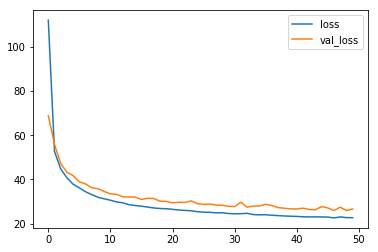

In [0]:
train_history = model.fit(X_train, y_train, epochs=50, batch_size=16,validation_data = [X_test,y_test])
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

In [0]:
np.max(np.array(test_df))

1.0

In [0]:
predictions = model.predict(np.array(test_df))

In [0]:
predictions1 = predictions * (normalize_train[10][1] - normalize_train[10][0]) + normalize_train[10][0];

In [0]:
de = y_test * (normalize_train[10][1] - normalize_train[10][0]) + normalize_train[10][0];

In [0]:
de.shape

(975,)

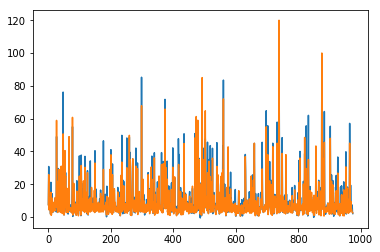

In [0]:
#import matplotlib.pyplot as plt
plt.plot(predictions1)
plt.plot(de)


In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(y_pred = predictions1 , y_true = de)

19.484695364695664

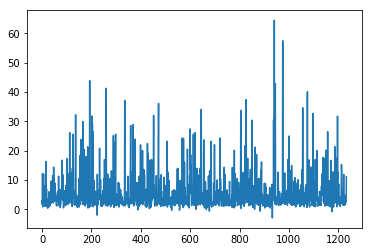

In [0]:
plt.plot(predictions)

In [0]:
predictions = np.where(predictions < 0 , 0 , predictions)

In [0]:
predictions = np.round(predictions,2)

In [0]:
c = np.savetxt('abc.txt',predictions,delimiter='\n')

In [0]:
np.min(predictions)

0.0